지도 학습

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import mglearn #데이터를 만들어주고 그림도 그려준다

In [6]:
!pip install mglearn

In [17]:
#지도 학습 알고리즘
X,y = mglearn.datasets.make_forge()#대문자 x는 Label, 소문자 y는 Feature
X,y = mglearn.datasets.make_wave(n_sample=40) #40개의 샘플 불러오기
#mglearn은 삼각형 그림을 그릴 수 있는 메소드이다.

#여태까지는 plt.plot으로 그렸으나 편하게 mglearn이 마련해놨다
mglearn.discrete_scatter(X[:,0], X[:,1], y) #X축이 각각 x,y축 / y의 값들이 동그라미, 세모

plt.xlabel('First')
plt.ylabel('Second')
plt.legend() #범주를 보여주기 위해 legend 사용
print(X.shape) #y의 값을 나타냄

TypeError: make_wave() got an unexpected keyword argument 'n_sample'

No handles with labels found to put in legend.


(40, 1)


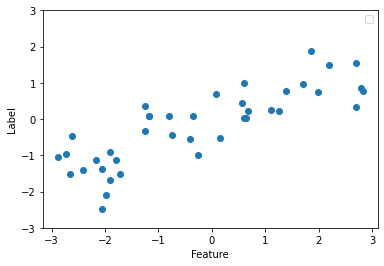

In [18]:
#지도 학습 알고리즘
X,y = mglearn.datasets.make_wave(n_samples=40) #40개의 샘플 불러오기 (분포를 만들 때 사용하는 make_wave)
#mglearn은 삼각형 그림을 그릴 수 있는 메소드이다.

plt.plot(X,y,'o')
plt.ylim(-3,3) #폭을 -3에서 3까지 지정

plt.xlabel('Feature')
plt.ylabel('Label')
plt.legend() #범주를 보여주기 위해 legend 사용
print(X.shape) #y의 값을 나타냄

In [19]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer() #데이터를 가지고 옴
print(cancer.keys()) #키값 확인

#feature_names가 키!
#Numpy배열안에 키값들이 들어있음

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [20]:
cancer.data.shape #유방암 데이터의 Feature 30개의 요소로 인해 유방암이 정의되어 있고, 그 데이터가 569개 쌓여있다

(569, 30)

In [21]:
#cancer.target #malignant #benign

cancer.target_names #데이터의 내용 확인해보기
#타겟의 종류 양성/음성 두개로 구별되어있다

cancer.feature_names #30개의 요소에 의해 유방암이 결정된다.

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


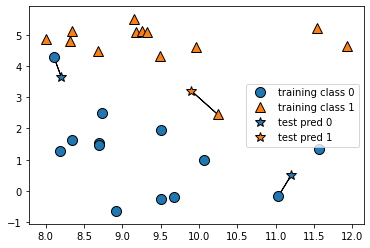

In [22]:
#k 최근접 데이터 

mglearn.plots.plot_knn_classification(n_neighbors=1) #classfication데이터를 눈으로 볼 수 있고, 최근접 데이터를 1개로 놓는다


#세모는 타겟 데이터의 2번
#기준이 1개이기 때문에 주황 별 1개


C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


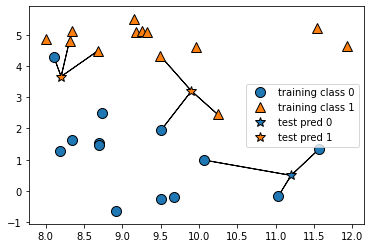

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#최근접 알고리즘
#근처에 가까운 것만 찾으면 되니까 속도가 빠르다

데이터를 학습하기 위해선 데이터를 쪼개야 한다. 
(일반적으로 학습을 위한 train set / 테스트를 위한 test set으로,
또한 검증용으로 vailidation으로 3개로 만들기도 한다)

In [24]:
from sklearn.model_selection import train_test_split #데이터 쪼개는 역할
X,y=mglearn.datasets.make_forge() #위에서 본 데이터가 똑같이 생성된다

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #0을 안주면 무작위로 섞기 때문에 0을 주고 선생님과 결과를 맞춘다

C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [25]:
from sklearn.neighbors import KNeighborsClassifier #sklearn의 최근접 알고리즘 세팅 
clf = KNeighborsClassifier(n_neighbors=5) #인자=최근접을 몇개까지 감안하는 알고리즘을 사용할 것인가

In [26]:
#학습 시키기
clf.fit(X_train, y_train) #학습용 데이터의 라벨을 주고 학습시킨다

KNeighborsClassifier()

In [27]:
clf.predict(X_test)  #예상에 의한 결과

array([1, 0, 1, 0, 1, 0, 0])

In [28]:
clf.score(X_test,y_test) #예상 데이터, 오리지날 데이터로 점수 매기기

0.8571428571428571

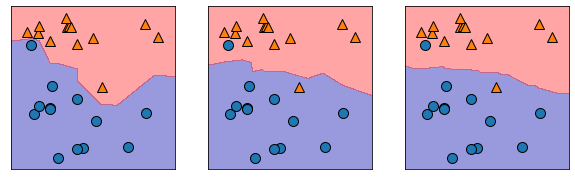

In [29]:
fig,axes=plt.subplots(1,3, figsize=(10,3)) #한 라인에 그림(서브 플롯)을 세 개 그릴 수 있으며 사이즈는 10,3
for n_neighbors, ax in zip([1,3,9], axes): #최근접으로 분류하기
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,#2차원으로 쪼개진 것을 보여주겠다
                                  alpha=0.4)
    
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax) #x의 1번 축/x의 2번 축/ y값 /축
    
    #근접이 1개, 3개, 9개인 그래프가 나타남

In [30]:
from sklearn.datasets import load_breast_cancer #데이터 다시 준비하기

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11) #최근접을 1개부터 11개까지 바꿔가며 최근접 알고리즘 실행

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors) #알고리즘 적용 
    clf.fit(X_train,y_train) #학습
    
    training_accuracy.append(clf.score(X_train,y_train)) #학습, 훈련 결과물
    test_accuracy.append(clf.score(X_test,y_test)) #테스트 정확도

In [31]:
print(training_accuracy) #학습 정확도 : 학습 정확도만을 높이는 것은 정답이 아니다
print(test_accuracy) #테스트 정확도

[1.0, 0.9671361502347418, 0.9671361502347418, 0.9553990610328639, 0.9483568075117371, 0.9483568075117371, 0.9436619718309859, 0.9413145539906104, 0.9460093896713615, 0.9413145539906104]
[0.9230769230769231, 0.9020979020979021, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


Text(0, 0.5, 'Accuracy')

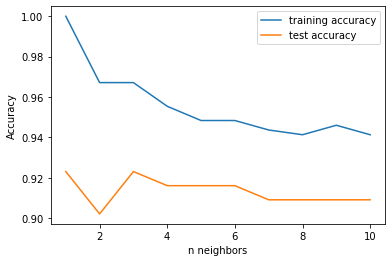

In [32]:
#그러므로 그래프를 그려보자
plt.plot(neighbors_settings,training_accuracy,label='training accuracy') #x축은 최근접의 개수, y는 정확도
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.legend() #그래프 안의 범례를 표시
plt.xlabel('n neighbors')
plt.ylabel('Accuracy') #두 가지 결과의 정확도가 나옴

#파랑 - 학습이 잘 되었는가?
#노랑 - 학습 데이터로 잘 테스트하였는가?

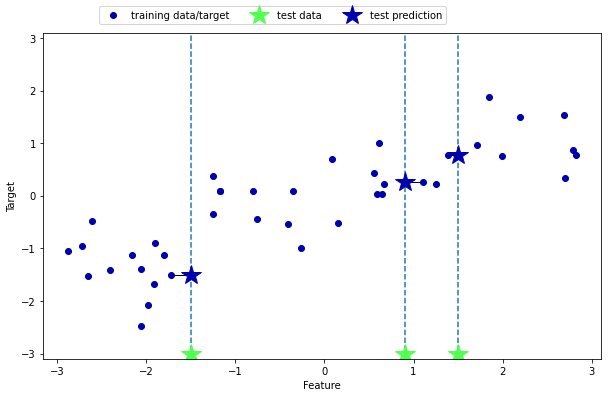

In [33]:
# Regression

mglearn.plots.plot_knn_regression(n_neighbors=1) #회귀 또한 최근접 알고리즘이므로 최근접을 1개로 설정

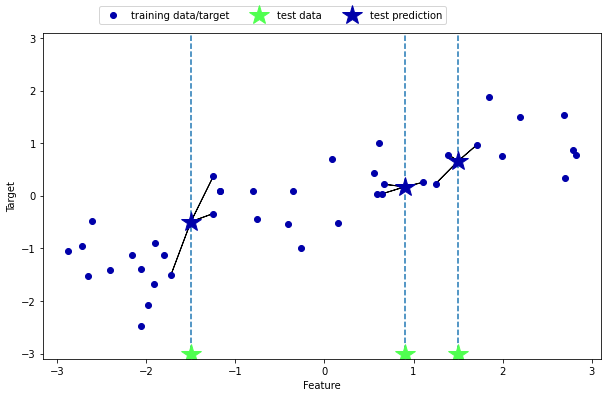

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=3) #3개를 근접하는 그래프 (별이 중심)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
X,y=mglearn.datasets.make_wave(n_samples=40) #샘플 40개의 데이터를 만듦
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train) #두 개의 값으로 훈련시키기

#이제 reg가 학습을 다 했으니 이것저것 물어보자

KNeighborsRegressor(n_neighbors=3)

In [36]:
reg.predict(X_test) #예측을 해보자
#학습 결과가 x, 테스트 결과가 x = 정답용 y라벨의 학습 결과는 y', 테스트 결과는 y'
#이것을 x와 y'로 비교해본다

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [37]:
#얼마나 정확한 지 보려면 score를 사용해보자
reg.score(X_test, y_test)

0.8344172446249605

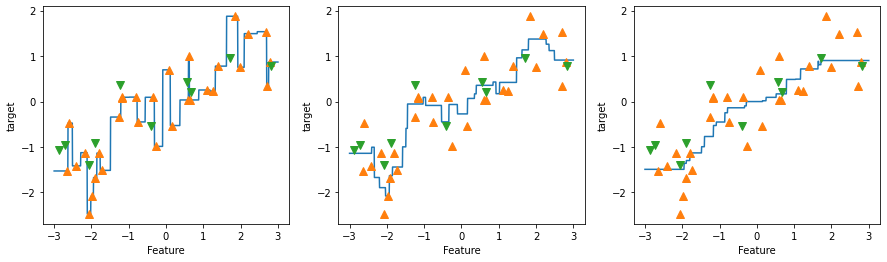

In [38]:
#비교를 위해 3개를 그려보자

fig, axes = plt.subplots(1,3, figsize=(15,4)) #x축과 y축을 변수로 받기

line = np.linspace(-3, 3, 1000).reshape(-1, 1) #-3~3 사이에 임의의 1000개의 데이터를 만들어라


for n_neighbors, ax in zip([1,3,9], axes):

  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line)) #1개는 꼬불꼬불, 3개는 부드럽게, 9개는 특성이 뭉개짐
  ax.plot(X_train,y_train,'^',markersize=8) #학습용 데이터 주황색 ^ 마크로 나옴!
    #1개는 학습용 데이터의 특성에 너무 딱 맞게 되어 임의의 데이터를 못 따라가는 오차가 커지게 됨
    #3개는 3개를 기준으로 통과해나감
    
#실제 학습용 데이터의 값도 그려보자
  ax.plot(X_test,y_test,'v',markersize=8)
#주황색이 예측, 초록색이 정답... 1은 완전 어긋, 3은 유사, 9는 앞부분만 맞고 뒷부분만 맞음 -> 정확도 유추 가능

  ax.set_xlabel('Feature')
  ax.set_ylabel('target')

w[0]: 0.393906  b: -0.031804


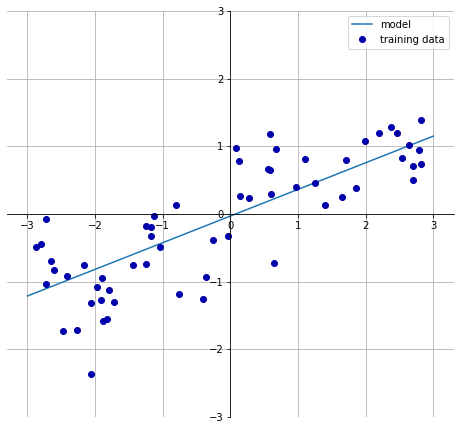

In [39]:
#np.linspace(-3, 3, 10).reshape(-1,1) #-1,1로 형태를 바꾸면 모양이 배열의 전체 요소가 가지런하게 세로로 나옴 
mglearn.plots.plot_linear_regression_wave()

In [40]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
#선형 회귀 그래프X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [41]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [42]:
lr.score(X_train, y_train)

0.6700890315075756

In [43]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [44]:
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.9520519609032729
0.6074721959665752


In [45]:
# Ridge / 릿지 알고리즘
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)

print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))

0.885796658517094
0.7527683481744755


In [46]:
ridge10=Ridge(alpha=10).fit(X_train,y_train) #alpha -> 학습을 더 이상 못하게 하는 제약값

print(ridge10.score(X_train,y_train))
print(ridge10.score(X_test,y_test))

0.7882787115369614
0.635941148917731


In [53]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) #제약을 완전 풀어줌

print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001985
0.772206793647982


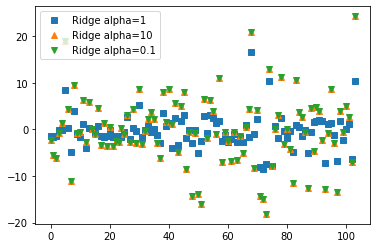

In [54]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.legend()

In [55]:
#Lasso 알고리즘 (회귀 알고리즘)

from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)

print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

0.29323768991114607
0.20937503255272294


In [57]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)

print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.8961122320864717
0.7677995670886713


C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [58]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)

print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))

0.9420931515237063
0.6976541391663642


C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [59]:
lasso0 = Lasso(alpha=0).fit(X_train, y_train) #제약 없이 마음껏 학습했음

print(lasso0.score(X_train, y_train))
print(lasso0.score(X_test, y_test))

0.9426383219008585
0.6916323869060191


C:\Users\hyerin\AppData\Local\Temp/ipykernel_14288/391880492.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso0 = Lasso(alpha=0).fit(X_train, y_train)
C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e+02, tolerance: 3.233e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coord

여태까지 배운 선형 회귀 알고리즘 : 
최근접
리니어
라쏘
릿지
(제약을 걸어서 일반 데이터에도 적용이 가능하게 한다, 제약에도 여러가지 종류가 있다!)

지금까지는 예측하는 용도로만 회귀를 사용함

이제는 분류에 대한 선형 모델 배울 예정!

C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


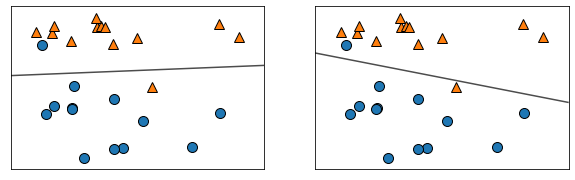

In [63]:
#분류에 대한 선형 모델 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)

  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,alpha=0.7, ax=ax)

  mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) #학습에 사용됐던 데이터가 x,y에 따라 다른 모양으로 나타나게 됨

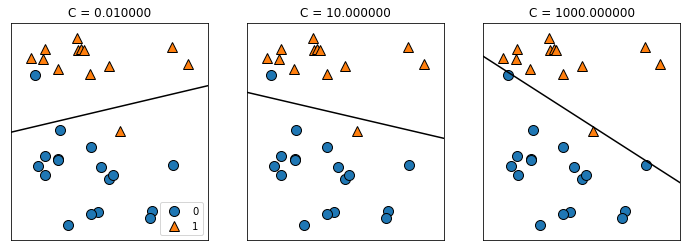

In [64]:
mglearn.plots.plot_linear_svc_regularization()

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=42)

logreg=LogisticRegression().fit(X_train,y_train) #아무 제약도 걸지 않은 상태
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.9413145539906104
0.965034965034965


C:\Users\hyerin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
logreg5000=LogisticRegression(max_iter=5000).fit(X_train,y_train) #5000번까지 제약을 늘린 상태
print(logreg5000.score(X_train,y_train))
print(logreg5000.score(X_test,y_test))

0.960093896713615
0.965034965034965


최적의 알고리즘을 찾아내는 것을 자동화시킬 수 있을까?<br>
알고리즘을 돌려보고, 파라미터를 조절하면 자동으로 할 수 있을 것이다.<br>
그래서 나온 것이 automated machine learning <br>
마이크로소프트에서 데이터 고르고 실험 시작 -> 분류 -> 전처리 / 차원축소 등등 가상머신이 자동으로 해줌<br>